In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import r2_score
from datetime import datetime

In [2]:
!pip install -U statsmodels


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/temperature.csv')

In [4]:
df.head()

,record_id,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,474376,1,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
1,474377,2,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
2,474378,3,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
3,474379,4,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
4,474380,5,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E


In [5]:
def parse_date(row):
  s = f"{row['year']}-{row['month']}-{row['day']}"
  return datetime.strptime(s, "%Y-%m-%d")

In [6]:
df['Date'] = df.apply(parse_date, axis = 1)

In [7]:
df['City'].value_counts()

Odesa           3214
Paris           3210
Kherson         3209
Wroclaw         3208
Kiev            3208
Lvov            3207
Stockholm       3207
Warsaw          3203
Marseille       3202
Uppsala         3201
Canoas          2157
Brasília        2156
Tottori         2056
Tokyo           2001
Hamilton        1914
Auckland        1912
Cape Town       1866
Johannesburg    1855
Name: City, dtype: int64

In [8]:
Tokyo = df[df['City'] == 'Tokyo'].copy().dropna()
Cape_Town = df[df['City'] == 'Cape Town'].copy().dropna()

In [9]:
Tokyo = Tokyo[['Date', 'AverageTemperatureFahr']].copy()
Cape_Town = Cape_Town[['Date', 'AverageTemperatureFahr']].copy()

In [10]:
Tokyo.set_index(Tokyo['Date'], inplace = True)
Tokyo.drop('Date', axis = 1, inplace = True)
Tokyo.columns = ['TokyoTemp']

In [11]:
Tokyo.head()

,TokyoTemp
Date,
1845-01-01,36.2786
1845-02-01,34.3616
1845-03-01,41.4968
1845-04-01,50.6966
1845-05-01,58.8614


In [12]:
Cape_Town.set_index(Cape_Town['Date'], inplace = True)
Cape_Town.drop('Date', axis = 1, inplace = True)
Cape_Town.columns = ['CapeTownTemp']

In [13]:
Cape_Town.head()

,CapeTownTemp
Date,
1857-01-01,65.2190
1857-02-01,67.5698
1857-03-01,64.3172
1857-04-01,58.6220
1857-05-01,56.6960


In [14]:
joined_df = Cape_Town.join(Tokyo, how = 'outer')

In [15]:
joined_df.shape

(2021, 2)

In [28]:
joined_part = joined_df.iloc[-500:].copy()
joined_part.index_freq = 'MS'

In [29]:
joined_part.isna().sum()

CapeTownTemp    0
TokyoTemp       0
dtype: int64

In [30]:
joined_part.interpolate(inplace = True)

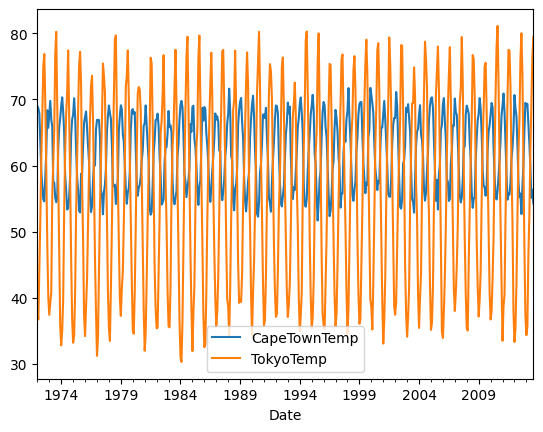

In [31]:
joined_part.plot();